In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.linear_model import LinearRegression

In [2]:
matplotlib.rc("font", size=18)
houses = pd.read_csv('data/1.4_houses.csv')
houses

,dim_1,dim_2,level,price
0,29,28,luxury,2212.0
1,28,29,luxury,2203.0
2,6,9,basic,254.0
3,5,9,basic,242.0
4,6,6,basic,195.0
...,...,...,...,...
95,27,27,luxury,1991.0
96,29,27,luxury,2150.0
97,24,11,medium,891.0
98,21,18,medium,1121.0


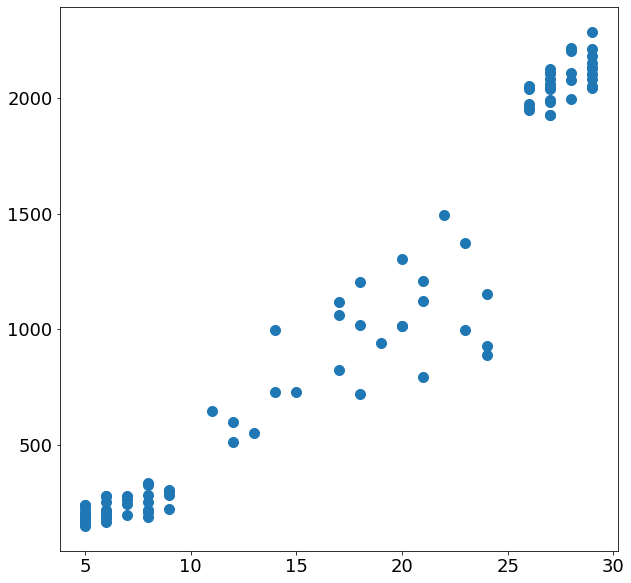

In [31]:
fig = plt.figure(figsize=(10, 10))
ax = plt.axes()

ax.scatter(houses['dim_1'], houses['price'], s=100)

plt.show()

In [3]:
X = houses[['dim_1']]
y = houses['price']

reg = LinearRegression().fit(X, y)

In [56]:
[first_koeff] = reg.coef_
second_koeff = reg.intercept_

def get_prediction(dim_1):
    return second_koeff + first_koeff * dim_1

get_prediction(X.dim_1[0])

2057.887633711507

In [6]:
reg.predict(X[0:5])

array([2057.88763371, 1974.79893262,  146.84750868,   63.75880759,
        146.84750868])

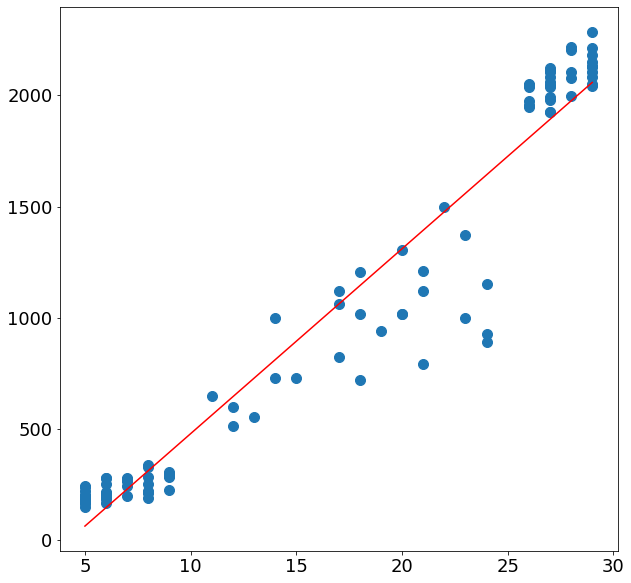

In [58]:
fig = plt.figure(figsize=(10, 10))
ax = plt.axes()

ax.scatter(houses['dim_1'], houses['price'], s=100)
ax.plot([X.dim_1.min(), X.dim_1.max()], [get_prediction(X.dim_1.min()), get_prediction(X.dim_1.max())], c='red')

plt.show()

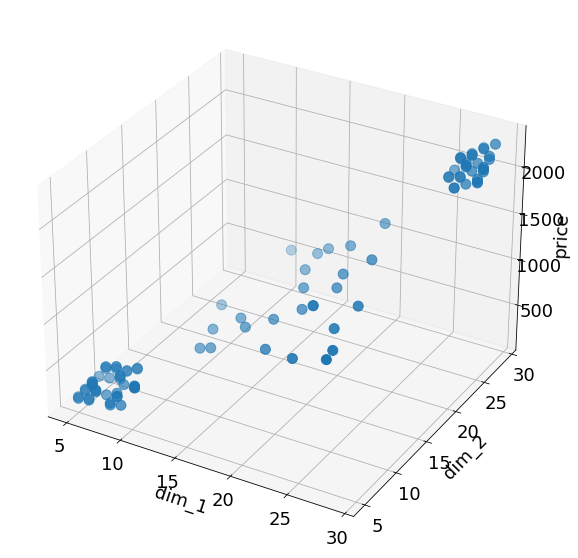

In [60]:
# работа с двумя признаками

fig = plt.figure(figsize=(10, 10))
ax = plt.axes(projection='3d')

ax.scatter(houses['dim_1'], houses['dim_2'], houses['price'], s=100)

ax.set_xlabel('dim_1')
ax.set_ylabel('dim_2')
ax.set_zlabel('price')

plt.show()

In [8]:
X = houses[['dim_1', 'dim_2']]
y = houses['price']

reg = LinearRegression().fit(X, y)

In [9]:
reg.coef_

array([34.38095466, 53.54529546])

In [62]:
reg.predict(X[0:10])

array([2080.8235918 , 2099.9879326 ,  272.70102077,  238.32006611,
        112.06513438,  184.77477065, 2065.60697793, 1124.90372734,
        161.66270291, 1973.73300087])

In [64]:
d1, d2 = list(), list()
for x in np.linspace(min(houses['dim_1']), max(houses['dim_1']), 100):
    for y in np.linspace(min(houses['dim_2']), max(houses['dim_2']), 100):
        d1.append(x)
        d2.append(y)
        
d1 = np.array(d1).reshape(-1, 1)
d2 = np.array(d2).reshape(-1, 1)
p = reg.predict(np.concatenate([d1, d2], axis=1))

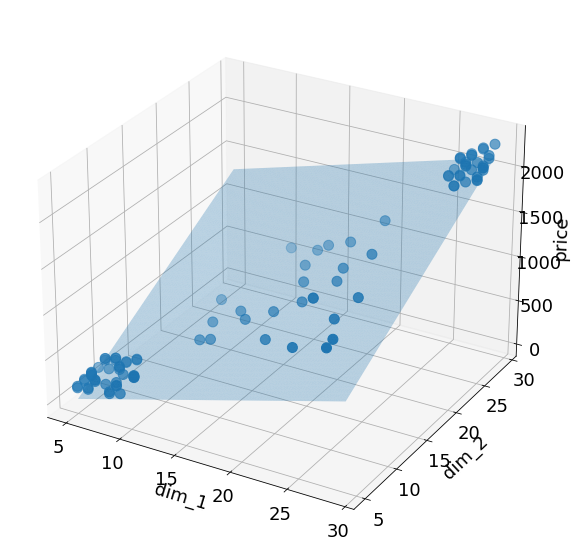

In [68]:
# работа с двумя признаками

fig = plt.figure(figsize=(10, 10))
ax = plt.axes(projection='3d')

ax.scatter(houses['dim_1'], houses['dim_2'], houses['price'], s=100)

ax.plot_trisurf(d1.ravel(), d2.ravel(), p.ravel(), alpha=0.3)

ax.set_xlabel('dim_1')
ax.set_ylabel('dim_2')
ax.set_zlabel('price')

ax.elev = 27
plt.show()